# **Lab 5: Summary of Image Processing Concepts**   
Dr. Amr Amin  
Ahmed Alqassas  
Autumn 2024-25  
> This lab summarizes key concepts from the previous four labs, with simplified code examples for each topic.

## **1. Digital Image Basics**
**GitHub Link:** [Lab 1 Repository](https://github.com/qassasahmed/ip/tree/main/LABS2425/1)  
### **Key Concepts**
- Digital image structure: pixels, acquisition, sampling, and quantization.
- Image manipulation using Python libraries such as `skimage` and `matplotlib`.
- Tasks:
  - Displaying an image.
  - Converting RGB to grayscale.
  - Exploring image properties like shape and data type.
  - Splitting RGB into individual color channels.`

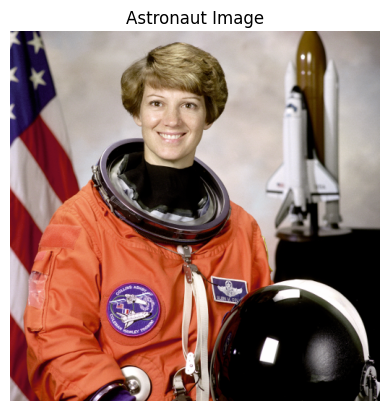

In [24]:
from skimage import data
import matplotlib.pyplot as plt

# Load and display an image
image = data.astronaut()  # Built-in example image
plt.imshow(image)
plt.title("Astronaut Image")
plt.axis('off')
plt.show()

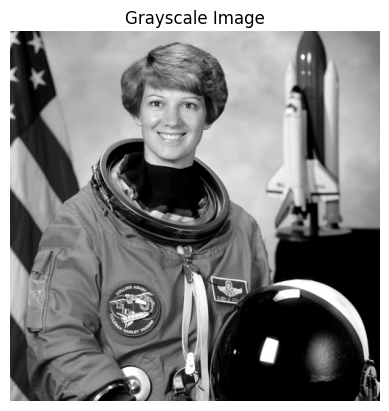

In [25]:
from skimage.color import rgb2gray

# Convert to grayscale
gray_image = rgb2gray(image)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

## **Lab 2: Image Processing in Spatial Domain**
**GitHub Link:** [Lab 2 Repository](https://github.com/qassasahmed/ip/tree/main/LABS2425/2)

### **Key Concepts**
- Sampling, quantization, and aliasing.
- Histogram analysis and its interpretation.
- Techniques:
  - Contrast stretching.
  - Histogram equalization.
  - RMS contrast calculation.


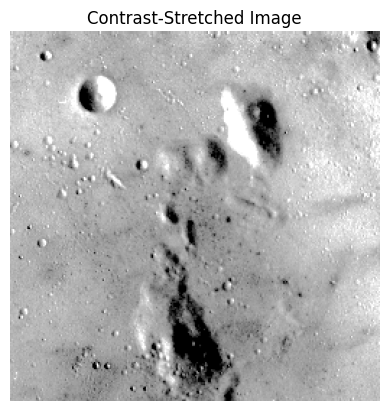

In [26]:
from skimage import exposure
import numpy as np

# Apply contrast stretching
moon = data.moon()
p2, p98 = np.percentile(moon, (2, 98))
stretched_image = exposure.rescale_intensity(moon, in_range=(p2, p98))

plt.imshow(stretched_image, cmap='gray')
plt.title("Contrast-Stretched Image")
plt.axis('off')
plt.show()

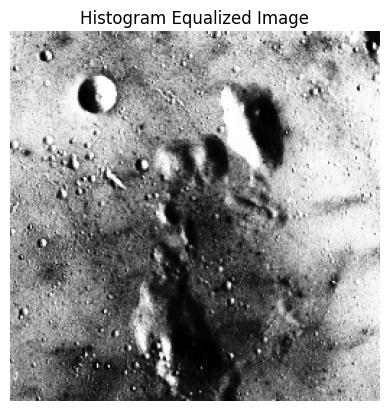

In [27]:
from skimage.exposure import equalize_hist
from skimage import img_as_ubyte

# Apply histogram equalization
equalized_image = img_as_ubyte(equalize_hist(moon))
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()

## **Lab 3: Transformations and Histogram Specification**
**GitHub Link:** [Lab 3 Repository](https://github.com/qassasahmed/ip/tree/main/LABS2425/3)

### **Key Concepts**
- Image transformations: rescaling, resizing, and interpolation.
- Histogram specification for customizing image intensity distributions.
- Image negative generation.

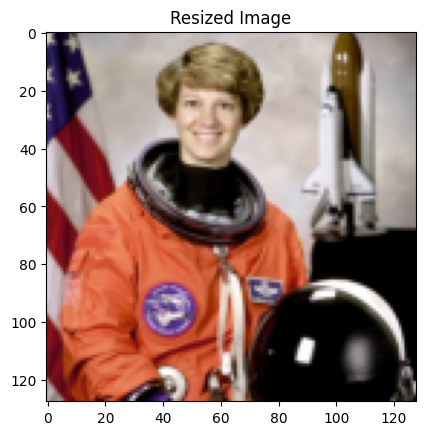

In [28]:
from skimage.transform import rescale, resize

# Rescale (scale down by 50%)
rescaled_image = rescale(image, 0.5, anti_aliasing=True)

# Resize (to 128x128 pixels)
resized_image = resize(image, (128, 128), anti_aliasing=True)

plt.imshow(resized_image)
plt.title("Resized Image")
# plt.axis('off')
plt.show()

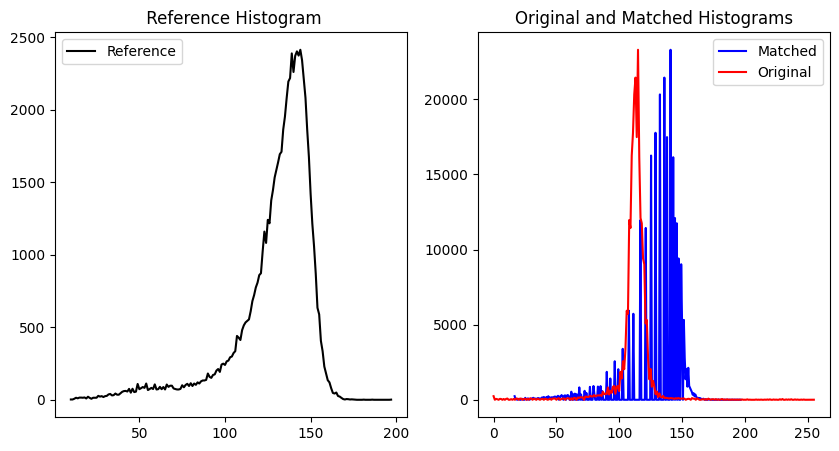

In [29]:
image = data.moon()
reference = data.text()
matched = exposure.match_histograms(image, reference)

hist, bins = exposure.histogram(matched)
hist_org, bins_org = exposure.histogram(image)
hist_ref, bins_ref = exposure.histogram(reference)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(bins_ref, hist_ref, color='k', label='Reference')
ax[0].set_title(" Reference Histogram")
ax[0].legend()

ax[1].plot(bins, hist, color='b', label='Matched')
ax[1].plot(bins_org, hist_org, color='r', label='Original')
ax[1].set_title("Original and Matched Histograms")
ax[1].legend()
plt.show()

## **Lab 4: Smoothing and Edge Detection Filters**
**GitHub Link:** [Lab 4 Repository](https://github.com/qassasahmed/ip/tree/main/LABS2425/4)

### **Key Concepts**
- Smoothing filters: Median, Mean, Gaussian, Bilateral, Non-Local Means.
- Edge detection filters: Sobel, Scharr, Prewitt, Roberts, and Canny.
- Tasks:
  - Reducing noise with smoothing filters.
  - Highlighting edges using gradient-based filters.

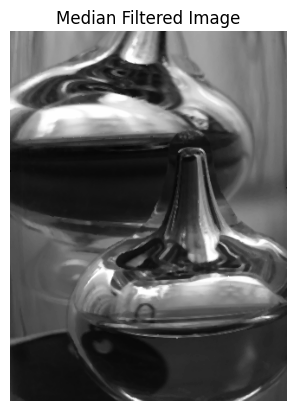

In [30]:
from skimage.filters import median
from skimage import io

# Load a noisy image
noisy_image = io.imread('Noise_salt_and_pepper.png', as_gray=True)
smoothed_image = median(noisy_image)

plt.imshow(smoothed_image, cmap='gray')
plt.title("Median Filtered Image")
plt.axis('off')
plt.show()

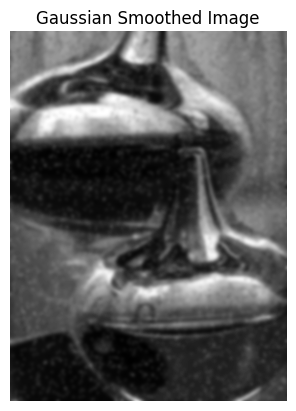

In [31]:
from skimage.filters import gaussian

# Apply Gaussian filter
smoothed_gaussian = gaussian(noisy_image, sigma=2)
plt.imshow(smoothed_gaussian, cmap='gray')
plt.title("Gaussian Smoothed Image")
plt.axis('off')
plt.show()

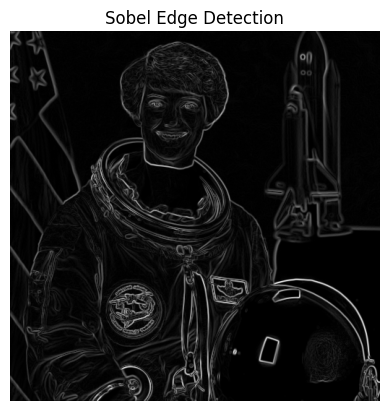

In [32]:
from skimage.filters import sobel

# Sobel edge detection
edges = sobel(gray_image)
plt.imshow(edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()

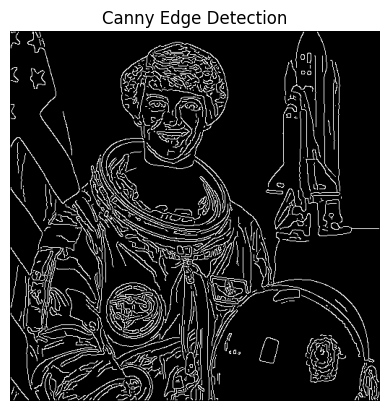

In [33]:
from skimage.feature import canny

# Canny edge detection
canny_edges = canny(gray_image, sigma=1)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

## **Summary**
This lab has reviewed:
1. Basics of digital images.
2. Spatial domain processing and histograms.
3. Image transformations.
a